In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, log_loss, confusion_matrix
# scientific format off
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
# show all columns in pandas df
pd.set_option('display.max_columns', None)

# ЗАДАЧА 1

1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
3. сделать feature engineering
4. обучить любой классификатор (какой вам нравится)

In [2]:
path = r'../!ADDS/lection6_materials/default_of_credit_card_clients.xls'

In [3]:
df = pd.read_excel(path, header=1)
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,-0.291,51223.331,49179.075,47013.155,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,1.150,73635.861,71173.769,69349.387,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3558.750,2984.750,2666.250,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,0.000,22381.500,21200.000,20088.500,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,0.000,67091.000,64006.250,60164.750,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [5]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['default payment next month'], random_state=0)

Стандартное обучение градиентному бустингу

In [6]:
model = GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0)
# params = {'n_estimators':[10, 50, 100, 200], 
#           'max_depth':[2, 5, 7, 10]
#           }

# grid = GridSearchCV(model,
#                     param_grid=params,
#                     scoring='r2', 
#                     cv=KFold(n_splits=3, random_state=42, shuffle=True), 
#                     n_jobs=-1)

# model_grid = grid.fit(X_train, y_train)
# model_grid.best_params_

In [7]:
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:, 1]
preds[:10]

array([0.59867515, 0.24242534, 0.22266532, 0.1131092 , 0.10456564,
       0.3325596 , 0.10008596, 0.22838862, 0.0928295 , 0.21184217])

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def get_scores(y_true, 
               y_predicted, 
               f_score_b=1, 
               title='Confusion matrix', 
               classes=['Default', 'NonDefault'],
               b=1,
               normalize=False):
    """
    calculate:
    - precision
    - recall
    - fscore
    - roc-auc
    - confusion matrix
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)
    fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    roc_auc = roc_auc_score(y_true, y_predicted)
    log_loss_score = log_loss(y_true, y_predicted)
    
    cm = confusion_matrix(y_true, y_predicted>=thresholds[ix])
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    TNR = TN/(FP+TN)
    print(f'\
Threshhold = {thresholds[ix]:.3f}\n\
Precision  = {precision[ix]:.3f}\n\
Recall     = {recall[ix]:.3f}\n\
F-score    = {fscore[ix]:.3f}\n\
ROC_AUC    = {roc_auc:.3f}\n\
Log_loss   = {log_loss_score:.3f}\n\
True_pos   = {TPR:.3f}\n\
False_pos  = {FPR:.3f}\n\
True_neg   = {TNR:.3f}\n')

    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds_ = roc_curve(y_true, y_predicted, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
    
    font = {'size' : 15}
    plt.rc('font', **font)
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.Blues
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] >= thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return {
            'Threshold': thresholds[ix],
            'Precision': precision[ix],
            'Recall': recall[ix],
            'F-score': fscore[ix],
            'ROC_AUC': roc_auc,
            'Log_loss': log_loss_score,
            'True_pos': TPR,
            'False_pos': FPR,
            'True_neg': TNR,
            'TN'      : TN,
            'FN'      : FN,
            'TP'      : TP,
            'FP'      : FP
            }

Threshhold = 0.264
Precision  = 0.542
Recall     = 0.549
F-score    = 0.546
ROC_AUC    = 0.781
Log_loss   = 0.426
True_pos   = 0.549
False_pos  = 0.129
True_neg   = 0.871



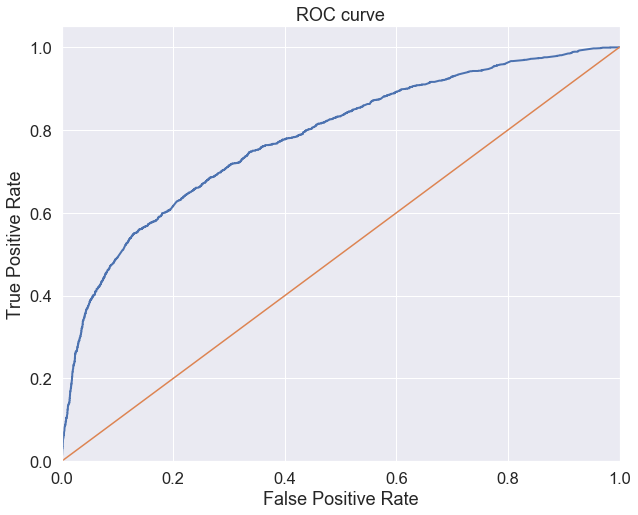

Confusion matrix, without normalization
[[5112  756]
 [ 736  896]]


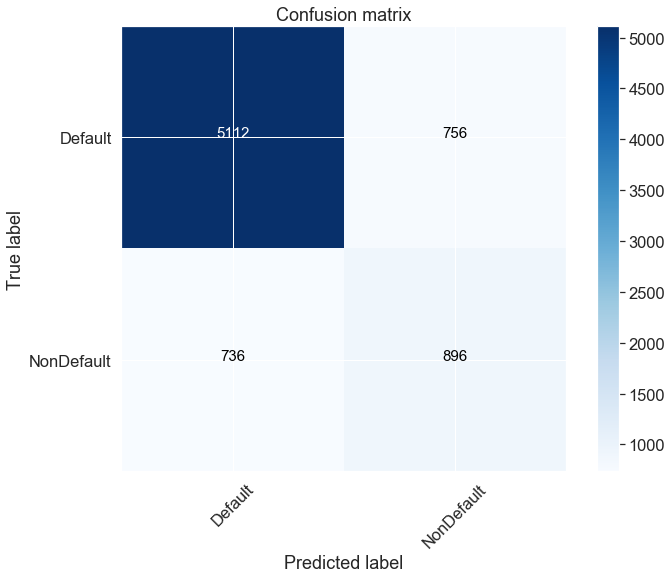

In [10]:
results = get_scores(y_test, preds, classes=['Default', 'NonDefault'],
                      title='Confusion matrix')

In [11]:
model.feature_importances_

array([0.00454732, 0.01788866, 0.0020172 , 0.00379453, 0.00249176,
       0.        , 0.68898589, 0.07740082, 0.04411871, 0.0159032 ,
       0.02850194, 0.03174697, 0.01092081, 0.00311307, 0.        ,
       0.00047524, 0.00154167, 0.        , 0.02232294, 0.02000186,
       0.01266192, 0.00688241, 0.        , 0.00468309])

# ЗАДАЧА 2

5. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

In [12]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
P = 0.25

In [14]:
mod_df = df.copy()
# берем индексы всез дефолтов и перемешиваем их
pos_ind = np.where(mod_df.iloc[:,-1].values == 1)[0]
np.random.shuffle(pos_ind)
# берем 25% от всех перемешанных дефолтов
pos_sample_len = int(np.ceil(P * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 1659/6636 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [15]:
mod_df['class_test'] = -1
mod_df.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_df.iloc[:,-1].value_counts())

target variable:
 -1    28341
 1     1659
Name: class_test, dtype: int64


In [16]:
mod_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,class_test
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,-1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,-1
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,-1
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-1
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,-1
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-1
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,-1
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,-1
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,-1


In [17]:
x_data = mod_df.iloc[:,:-2].values # just the X 
y_labeled = mod_df.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_df.iloc[:,-2].values # original class

# ЗАДАЧА 3

6. применить random negative sampling для построения классификатора в новых условиях

In [18]:
# random negative sampling
mod_df = mod_df.sample(frac=1)
neg_sample = mod_df[mod_df['class_test']==-1][:len(mod_df[mod_df['class_test']==1])]
sample_test = mod_df[mod_df['class_test']==-1][len(mod_df[mod_df['class_test']==1]):]
pos_sample = mod_df[mod_df['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(1659, 26) (1659, 26)


In [19]:
mod_model = GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0)
mod_model.fit(sample_train.iloc[:,:-2].values, 
              sample_train.iloc[:,-2].values)
mod_y_predict = mod_model.predict(sample_test.iloc[:,:-2].values)

Threshhold = 1.000
Precision  = 0.300
Recall     = 0.735
F-score    = 0.426
ROC_AUC    = 0.686
Log_loss   = 11.944
True_pos   = 0.735
False_pos  = 0.363
True_neg   = 0.637



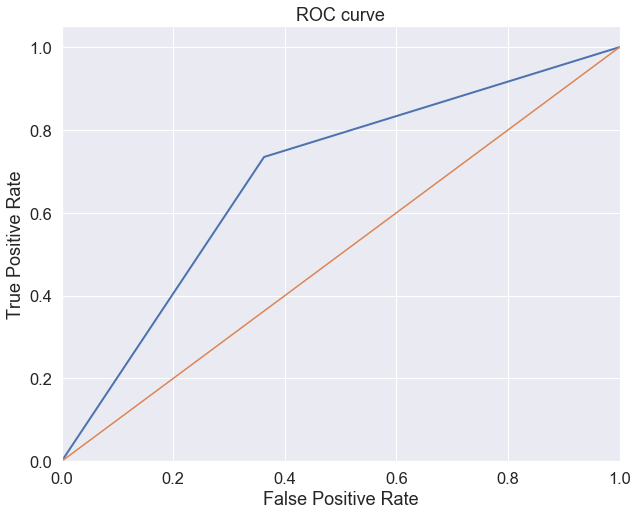

Confusion matrix, without normalization
[[14031  7991]
 [ 1236  3424]]


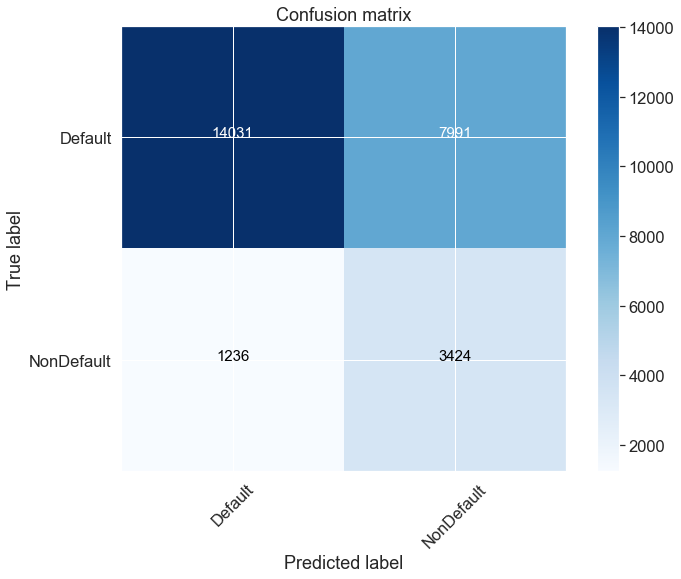

In [20]:
mod_results = get_scores(sample_test.iloc[:,-2].values, mod_y_predict)

# ЗАДАЧА 4

7. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

In [21]:
# Сравниваем результаты
def df_highlight_max(s):
    '''
    highlight the maximum
    '''
    is_max = s == s.max()
    return ['color: blue' if v else '' for v in is_max]

def df_bold_max(s):
    '''
    bold the maximum
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [22]:
models_names = ['common', 'lookalike']
models_acccuracy = pd.DataFrame(columns=models_names)
for i, col in enumerate(models_names):
    if i == 0:
        models_acccuracy = pd.DataFrame.from_dict(results, orient='index')
    else:
        models_acccuracy = pd.concat([models_acccuracy, 
                                       pd.DataFrame.from_dict(mod_results, orient='index')],
                                    axis=1)
models_acccuracy.columns = models_names
print('Сравнение качества получившихся данных\nпо столбцам -- метод,\nпо строкам -- метрика,\n\
цветом -- наилучшее значение\n')
models_acccuracy.style.apply(df_highlight_max, axis=1).apply(df_bold_max, axis=1)

Сравнение качества получившихся данных
по столбцам -- метод,
по строкам -- метрика,
цветом -- наилучшее значение



,common,lookalike
Threshold,0.263553,1.000000
Precision,0.542373,0.299956
Recall,0.549020,0.734764
F-score,0.545676,0.426003
ROC_AUC,0.780743,0.685950
Log_loss,0.426343,11.944220
True_pos,0.549020,0.734764
False_pos,0.128834,0.362864
True_neg,0.871166,0.637136
TN,5112.000000,14031.000000


***
***
***

# ЗАДАЧА 5

8. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [23]:
P = 0.4

In [24]:
mod2_df = df.copy()
# берем индексы всез дефолтов и перемешиваем их
pos_ind = np.where(mod2_df.iloc[:,-1].values == 1)[0]
np.random.shuffle(pos_ind)
# берем 25% от всех перемешанных дефолтов
pos_sample_len = int(np.ceil(P * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 2655/6636 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [25]:
mod2_df['class_test'] = -1
mod2_df.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod2_df.iloc[:,-1].value_counts())

target variable:
 -1    27345
 1     2655
Name: class_test, dtype: int64


In [26]:
mod2_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,class_test
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,-1
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,-1
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-1
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,-1
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-1
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,-1
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,-1
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,-1


In [27]:
x_data = mod2_df.iloc[:,:-2].values # just the X 
y_labeled = mod2_df.iloc[:,-1].values # new class (just the P & U)
y_positive = mod2_df.iloc[:,-2].values # original class

In [28]:
# random negative sampling
mod2_df = mod2_df.sample(frac=1)
neg_sample = mod2_df[mod2_df['class_test']==-1][:len(mod2_df[mod2_df['class_test']==1])]
sample_test = mod2_df[mod2_df['class_test']==-1][len(mod2_df[mod2_df['class_test']==1]):]
pos_sample = mod2_df[mod2_df['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(2655, 26) (2655, 26)


In [29]:
mod2_model = GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0)
mod2_model.fit(sample_train.iloc[:,:-2].values, 
              sample_train.iloc[:,-2].values)
mod2_y_predict = mod_model.predict(sample_test.iloc[:,:-2].values)

Threshhold = 1.000
Precision  = 0.263
Recall     = 0.749
F-score    = 0.389
ROC_AUC    = 0.694
Log_loss   = 11.880
True_pos   = 0.749
False_pos  = 0.360
True_neg   = 0.640



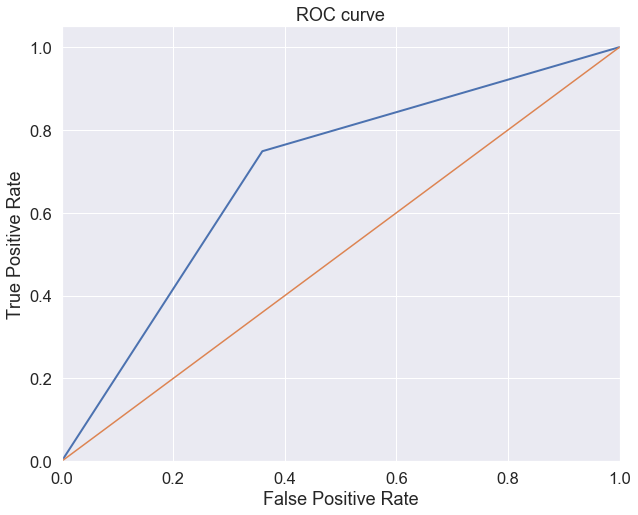

Confusion matrix, without normalization
[[13496  7585]
 [  907  2702]]


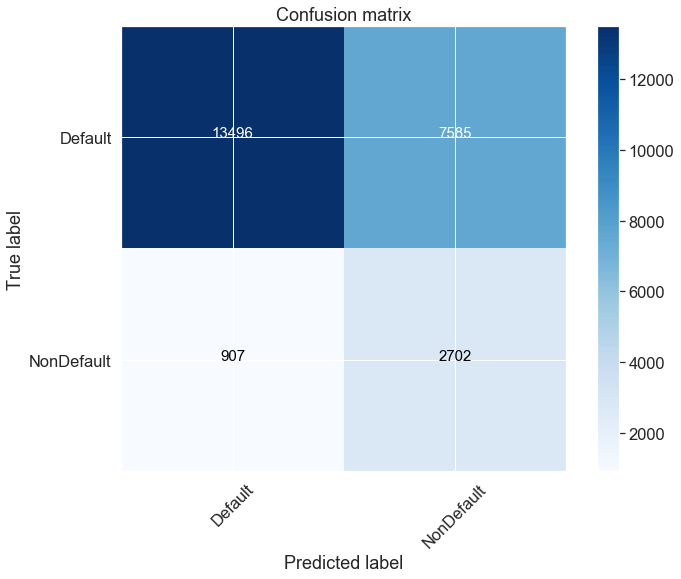

In [31]:
mod2_results = get_scores(sample_test.iloc[:,-2].values, mod2_y_predict)

In [32]:
models_names = ['common', 'lolokalike_0.25', 'lookalike_0.4']
models_acccuracy = pd.DataFrame(columns=models_names)
for i, col in enumerate(models_names):
    if i == 0:
        models_acccuracy = pd.DataFrame.from_dict(results, orient='index')
    elif i == 1:
        models_acccuracy = pd.concat([models_acccuracy, 
                                       pd.DataFrame.from_dict(mod_results, orient='index')],
                                    axis=1)
    else:
        models_acccuracy = pd.concat([models_acccuracy, 
                                       pd.DataFrame.from_dict(mod2_results, orient='index')],
                                    axis=1)
models_acccuracy.columns = models_names
print('Сравнение качества получившихся данных\nпо столбцам -- метод,\nпо строкам -- метрика,\n\
цветом -- наилучшее значение\n')
models_acccuracy.style.apply(df_highlight_max, axis=1).apply(df_bold_max, axis=1)

Сравнение качества получившихся данных
по столбцам -- метод,
по строкам -- метрика,
цветом -- наилучшее значение



,common,lolokalike_0.25,lookalike_0.4
Threshold,0.263553,1.000000,1.000000
Precision,0.542373,0.299956,0.262662
Recall,0.549020,0.734764,0.748684
F-score,0.545676,0.426003,0.388889
ROC_AUC,0.780743,0.685950,0.694441
Log_loss,0.426343,11.944220,11.879682
True_pos,0.549020,0.734764,0.748684
False_pos,0.128834,0.362864,0.359803
True_neg,0.871166,0.637136,0.640197
TN,5112.000000,14031.000000,13496.000000


Результаты получились неоднозначные. Использование lookalike random negative sampling позволило значительно улучшить recall, при существенном снижении precision